In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from optbinning import OptimalBinning
from sklearn.model_selection import train_test_split
import time


from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

In [2]:
dataset = pd.read_csv('creditcard.csv')
dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
#TARGET Distribution

a = dataset['Class'].value_counts().reset_index().rename(columns={'index':'transaction','Class':'count'})

# a.at[0, 'transaction'] = 'Non-fraudulent'
# a.at[1, 'transaction'] = 'Fraudulent'

a

,transaction,count
0,0,284315
1,1,492


In [4]:
dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### SELECT FEATURES AND TARGET

In [5]:
#Excluding TIME AND AMOUNT COLUMNS FOR Features, we will have - 
X = dataset[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']]
y = dataset['Class']

In [6]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153


In [7]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [8]:
list_features = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']

In [9]:
X_list = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']
y_list = ['target']

In [10]:
pd.set_option('float_format', '{:.16f}'.format)

b = X.describe()
b.T

,count,mean,std,min,25%,50%,75%,max
V1,284807.0000000000000000,0.0000000000000039,1.9586958038574793,-56.4075096313289990,-0.9203733843903220,0.0181087991615309,1.3156416938778650,2.4549299912112099
V2,284807.0000000000000000,0.0000000000000006,1.6513085794769742,-72.7157275629302973,-0.5985499134649160,0.0654855563960555,0.8037238712400945,22.0577289904909009
V3,284807.0000000000000000,-0.0000000000000088,1.5162550051777681,-48.3255893623953980,-0.8903648381551406,0.1798463435635440,1.0271955424655550,9.3825584328211402
V4,284807.0000000000000000,0.0000000000000028,1.4158685749409234,-5.6831711981699504,-0.8486401163312730,-0.0198465294811989,0.7433412894685876,16.8753440335975000
V5,284807.0000000000000000,-0.0000000000000016,1.3802467340314386,-113.7433067111460048,-0.6915970708876575,-0.0543358267364858,0.6119264397351930,34.8016658766686007
V6,284807.0000000000000000,0.0000000000000020,1.3322710897575674,-26.1605059358433003,-0.7682956084604891,-0.2741870765066510,0.3985648963561050,73.3016255459645976
V7,284807.0000000000000000,-0.0000000000000017,1.2370935981826603,-43.5572415712451004,-0.5540758790365226,0.0401030827945351,0.5704360728775986,120.5894939452380044
V8,284807.0000000000000000,-0.0000000000000002,1.1943529026692030,-73.2167184552673973,-0.2086297440394665,0.0223580364366631,0.3273458619234490,20.0072083651213006
V9,284807.0000000000000000,-0.0000000000000031,1.0986320892243226,-13.4340663182300997,-0.6430975702665915,-0.0514287315503490,0.5971390302822686,15.5949946071278003
V10,284807.0000000000000000,0.0000000000000018,1.0888497654025178,-24.5882624372475007,-0.5354257264933235,-0.0929173835961975,0.4539234451395070,23.7451361206545002


## Building Models

### TEST TRAIN SPLIT

In [11]:
# Split dataset into training and test sets (80/20 split)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split training set into training and validation sets (60/40 split)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

In [12]:
train = X_train.copy()
train['target'] = y_train

val = X_val.copy()
val['target'] = y_val

test = X_test.copy()
test['target'] = y_test

In [13]:
train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,target
201477,1.8297078634947701,-0.3170578329960600,-0.1402571200764110,1.4880306926628499,-0.8485591832064729,-0.7386253526012510,-0.3827714659648330,0.0097790623122258,1.0657845541922799,0.1815536624835810,...,-0.2866447234575860,-0.1769942808318070,-0.5658651607357620,0.4192263942008880,0.2290661910279690,-0.5192750341398970,-0.9997896117193660,0.0380586413165270,-0.0173318950063607,0
210354,-0.7408783549128650,0.9839723569293370,1.3643699382098300,-0.3238691611739310,-0.2900399738187280,-0.3676209946490350,0.1622754260802910,0.4173188499499740,-0.0627198323001338,-1.1640238995228500,...,-0.0920143728150568,-0.0584633741301784,-0.1925048508175820,-0.0295642208634585,-0.0969827234563286,-0.2769472833086030,-0.5241330236313070,0.0416947362914504,0.0801643471183744,0
218330,-0.9909143060445890,1.2150077150170000,2.4639939200758398,2.2563351781784400,0.8728501410499619,0.9357345242141351,0.5372933456743670,0.3204921121071760,-1.4089754734269999,0.1779746816080370,...,-0.0777813831505688,0.1736059716696800,0.3827734882882210,-0.4173671699299420,0.5599856053496480,0.7060416235315300,0.0419461594448137,0.0148762037246087,0.0736774802881987,0
237957,-1.8255763375654399,-7.5457968569636797,-3.0936105272659602,0.6225667122224270,-2.5880579217658699,0.9512032010393210,1.7446153622471201,-0.4226843880843390,-0.3624631958982090,-0.1602292817792090,...,4.2257958234685598,1.0522152308942401,-1.6367219185305300,-1.4382798025568899,0.2706848495985980,-1.1687928083113399,-0.8142586486215230,-0.3885274460518230,0.3083396639151180,0
121958,1.2331743502862200,-0.7848505006886980,0.3867838687451560,-0.6985587298845261,-1.0340184233751899,-0.6370278380861850,-0.5023690184547930,-0.1880574160237920,-0.7496372019180930,0.5430156706865640,...,0.3377324018675090,0.0276343343658972,-0.2345223673472830,-0.0595436773713236,-0.1090734615066030,0.2903255303111410,-0.3930743503910030,0.0012165726962087,0.0385878911833923,0


In [14]:
val.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,target
104878,1.1866380025130900,0.1743741769207610,0.1928108413923800,1.2832016018535699,0.0858430527050690,0.1002018320122160,0.0686974915932824,0.0123058575116847,0.3219173195161610,-0.1274747716083970,...,-0.1598178995441160,-0.1301846930802990,-0.1492927358000360,-0.1303855033950550,-0.4172608837224120,0.7274740116082290,-0.2820474770988530,0.0381509035533077,0.0120691701401724,0
105552,1.3380859400628999,-0.2629079416317180,-1.2243859642928701,-1.2299965803704200,1.8796846653493600,3.1318648310019102,-0.6161451745771790,0.7693045081542040,0.1494874292656700,-0.1396063864955840,...,0.0697895011018290,-0.1431036185799190,-0.5513172039379430,-0.0073255560446323,1.0678881919639100,0.4102496685883630,0.9942952355161661,-0.0811919953956108,-0.0018584666692168,0
9128,-0.7711663358013880,1.3973873744915699,1.4721449500732700,0.0658727783429212,0.0573499625723862,-0.7363744155546320,0.6875170446806040,-0.1929986718505380,1.2208615504066900,0.1266726381869230,...,0.3627664938045280,-0.4703324219676880,-0.7819733889178290,0.0210325489207486,0.4015641748853630,-0.1754942649373530,-0.0134051098567573,0.2626455144987130,-0.0152967430065522,0
201800,-0.7537903735236370,-0.0044629213689801,-0.2271104902325990,-2.4101257649197998,0.3270453507641150,-1.1343133901047300,0.1053301332923060,0.1007104944139760,1.3220032854250601,-0.7977655967972440,...,-0.1941584014814280,0.0394734817388765,0.1873841711514230,0.4473141340038730,0.7525427631048640,-2.3175396555874799,-0.2875163006063720,-0.0163333447449813,0.1751441973097160,0
60023,0.0791541716446725,1.2373299885647999,0.2632470530822530,1.1914608749189499,0.3570067818120550,-0.8379185614880650,0.6599041434620370,-0.1025626482939550,-0.3567543297045480,-0.5279300364588680,...,-0.1238480895860840,0.1913546744332810,0.6285419921422430,0.1058252952898730,0.2793347615959350,-1.0791055635381901,-0.4669507348411550,0.1131488640976090,0.2064815926061900,0


In [15]:
test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,target
43428,-16.5265065691231001,8.5849717958582197,-18.6498531851945017,9.5055935150872308,-13.7938185270957003,-2.8324042993974698,-16.7016942960450017,7.5173439037098699,-8.5070586367589804,-14.1101844415456998,...,-1.5149234352785199,1.1907386948142800,-1.1276700090206100,-2.3585787697881000,0.6734613289872370,-1.4136996745882000,-0.4627623613993300,-2.0185752487516102,-1.0428041697088100,1
49906,0.3398120639142600,-2.7437452373291999,-0.1340695109641110,-1.3857293091395999,-1.4514133205347499,1.0158865939183199,-0.5243790569210131,0.2240603760805970,0.8997460048689370,-0.5650116836485150,...,0.5060438852300960,-0.2134358435809590,-0.9425250246228400,-0.5268191745492340,-1.1569918974321700,0.3112105101850950,-0.7466466791293001,0.0409958026777039,0.1020378245701130,0
29474,1.3995902689098201,-0.5907012884809120,0.1686189404130430,-1.0299503252531901,-0.5398064520238560,0.0404441131922421,-0.7125666914385010,0.0022985938228074,-0.9717470922282260,0.7568005439948450,...,0.2128771951014150,0.1023976927603910,0.1682693387298800,-0.1666390899201730,-0.8102496795207900,0.5050831121075740,-0.2323400108184810,0.0114086453561191,0.0046341416580672,0
276481,-0.4320711359879600,1.6478952228322901,-1.6693606252026401,-0.3495042720266180,0.7857847250059350,-0.6306467140039300,0.2769901044867310,0.5860245453933550,-0.4847151830681740,-1.3766482665181701,...,-0.2446333125762960,0.3589315656136080,0.8736632165194770,-0.1786418125095820,-0.0171707728114413,-0.2073917150075750,-0.1577564373948350,-0.2373859894883220,0.0019341238860032,0
278846,2.0141602760497501,-0.1373940196171180,-1.0158389970770001,0.3272689587977600,-0.1821793289199010,-0.9565705602928301,0.0432408427124080,-0.1607459828487170,0.3632412033061380,0.2594519020750890,...,-0.2552929695985920,-0.2386438442350900,-0.6164004753306580,0.3470445692766810,0.0615611685302417,-0.3601956216861880,0.1747300145064920,-0.0780434545993313,-0.0705705093379492,0


## Feature Scaling - Min Max Scalar

In [16]:
scaler = MinMaxScaler()
train[X_list] = scaler.fit_transform(train[X_list])

In [18]:
train[X_list].iloc[0:5,0:5]

,V1,V2,V3,V4,V5
201477,0.9893782498359613,0.7639129389474688,0.9190884739545599,0.3201613998533374,0.7600038261894060
210354,0.9457071713877740,0.7776407297998795,0.9477877756407380,0.2392683497859555,0.7637637596267868
218330,0.9414593700269216,0.7800784941960470,0.9687620364870596,0.3544626848179563,0.7715922986517695
237957,0.9272794951037416,0.6876390613571439,0.8627561223913924,0.2815223873532628,0.7482935763690624
121958,0.9792438837268794,0.7589770351121058,0.9291412695997477,0.2225401724657524,0.7587553205218104


In [19]:
val[X_list] = scaler.transform(val[X_list])
val.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,target
104878,0.9784532887724136,0.7690982727718166,0.9254414222519809,0.3110167167942791,0.7662941921279715,0.2640271968498757,0.2657740278877347,0.7890676783160558,0.5752982320452810,0.6140688737798125,...,0.5785636527774615,0.5593808724317016,0.5030664933358203,0.6357409344609707,0.3260084408258764,0.6160530943927032,0.3721749962022934,0.2393159981848311,0.3133687853781137,0
105552,0.9810262017967629,0.7644843003110149,0.8984097678290074,0.1988139005329937,0.7783702764369429,0.2945077722590624,0.2616018909030080,0.7972245966057160,0.5680267111994436,0.6137643191108159,...,0.5810084011037361,0.5591726142560267,0.4843120576396368,0.6378822490894454,0.5261315836484101,0.5922878109378426,0.5830823305271293,0.2364407812898218,0.3130861507863728,0
9128,0.9451926160774141,0.7820028690801873,0.9498434794529660,0.2566685466897383,0.7661023775573650,0.2556161942390995,0.2695439447925103,0.7868554520867443,0.6132075046468569,0.6204490450089792,...,0.5841278781351031,0.5538975568509951,0.4735519499049793,0.6383756966026747,0.4363447342210071,0.5484060253230105,0.4165664006438636,0.2447245369744330,0.3128134468238638,0
201800,0.9454878121717176,0.7672112771425190,0.9174318301644284,0.1461265243462902,0.7679179582767481,0.2516152848616157,0.2659971979774947,0.7900202683887422,0.6174727409901720,0.5972417487601692,...,0.5781980117554452,0.5621158291413147,0.5187724662360695,0.6457932440146574,0.4836389347075430,0.3879318467105894,0.3712713086766283,0.2380033601259368,0.3166780792919347,0
60023,0.9596385091273592,0.7803140271644496,0.9267849246686007,0.3069209124917259,0.7681196576713892,0.2545952615039911,0.2693757239556372,0.7878299310425082,0.5466780488646381,0.6040157586942603,...,0.5789466418816624,0.5645642138859127,0.5393524722838672,0.6398511396862940,0.4198743779899125,0.4807107834010539,0.3416209351237391,0.2411228539353396,0.3173140114351304,0


In [20]:
test[X_list] = scaler.transform(test[X_list])
test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,target
43428,0.6775288845984946,0.8578425048047239,0.5660358828578883,0.6781089483557498,0.6728567547108579,0.2345425468859236,0.1636069531976976,0.8699370194326741,0.2029725139218915,0.2630439232844519,...,0.5641351457646552,0.5806746785595679,0.4574252075150569,0.5969690761990001,0.4729827484743738,0.4556442206784931,0.3423130366016897,0.1897652177563648,0.2919621605625015,1
49906,0.9640667641222433,0.7383078012582542,0.9192064965965508,0.1918611457221916,0.7559454314364507,0.2732335626120411,0.2621609402034247,0.7913494053758953,0.5996657783260426,0.6030848530489105,...,0.5856534263617511,0.5580388310423759,0.4660622183926331,0.6288427581043282,0.2263300329606699,0.5848681606985886,0.2954029989470052,0.2393845376798417,0.3151945261166397,0
29474,0.9820710842250368,0.7610255961677886,0.9249799852063393,0.2077450518307453,0.7620823396914370,0.2634263881005589,0.2610144803976578,0.7889598466413970,0.5207432606081845,0.6362679114635642,...,0.5825319295241262,0.5631301922470939,0.5178807595766376,0.6351101009783280,0.2730533845310259,0.5993923844544261,0.3803888318011630,0.2386717219584578,0.3132179057803484,0
276481,0.9509534238520816,0.7846460970202754,0.8899223077864505,0.2381238592108842,0.7710061770582396,0.2566791887675251,0.2670429694371237,0.7952496925829634,0.5412818266010095,0.5827093537324520,...,0.5776605793640202,0.5672656194821842,0.5507873738997947,0.6349012466271308,0.3799203960083677,0.5460163854385374,0.3927132823579990,0.2326777454102714,0.3131631141146017,0
278846,0.9925118680437317,0.7658086576424777,0.9023875989433054,0.2683386918515583,0.7644898740352368,0.2534023250865118,0.2656189431776990,0.7872029857958023,0.5770408967420644,0.6237823642034243,...,0.5775470805020906,0.5576324681270703,0.4812759239588051,0.6440484952936968,0.3905294882535592,0.5345688775939080,0.4476545066675415,0.2365166361397695,0.3116917720850071,0


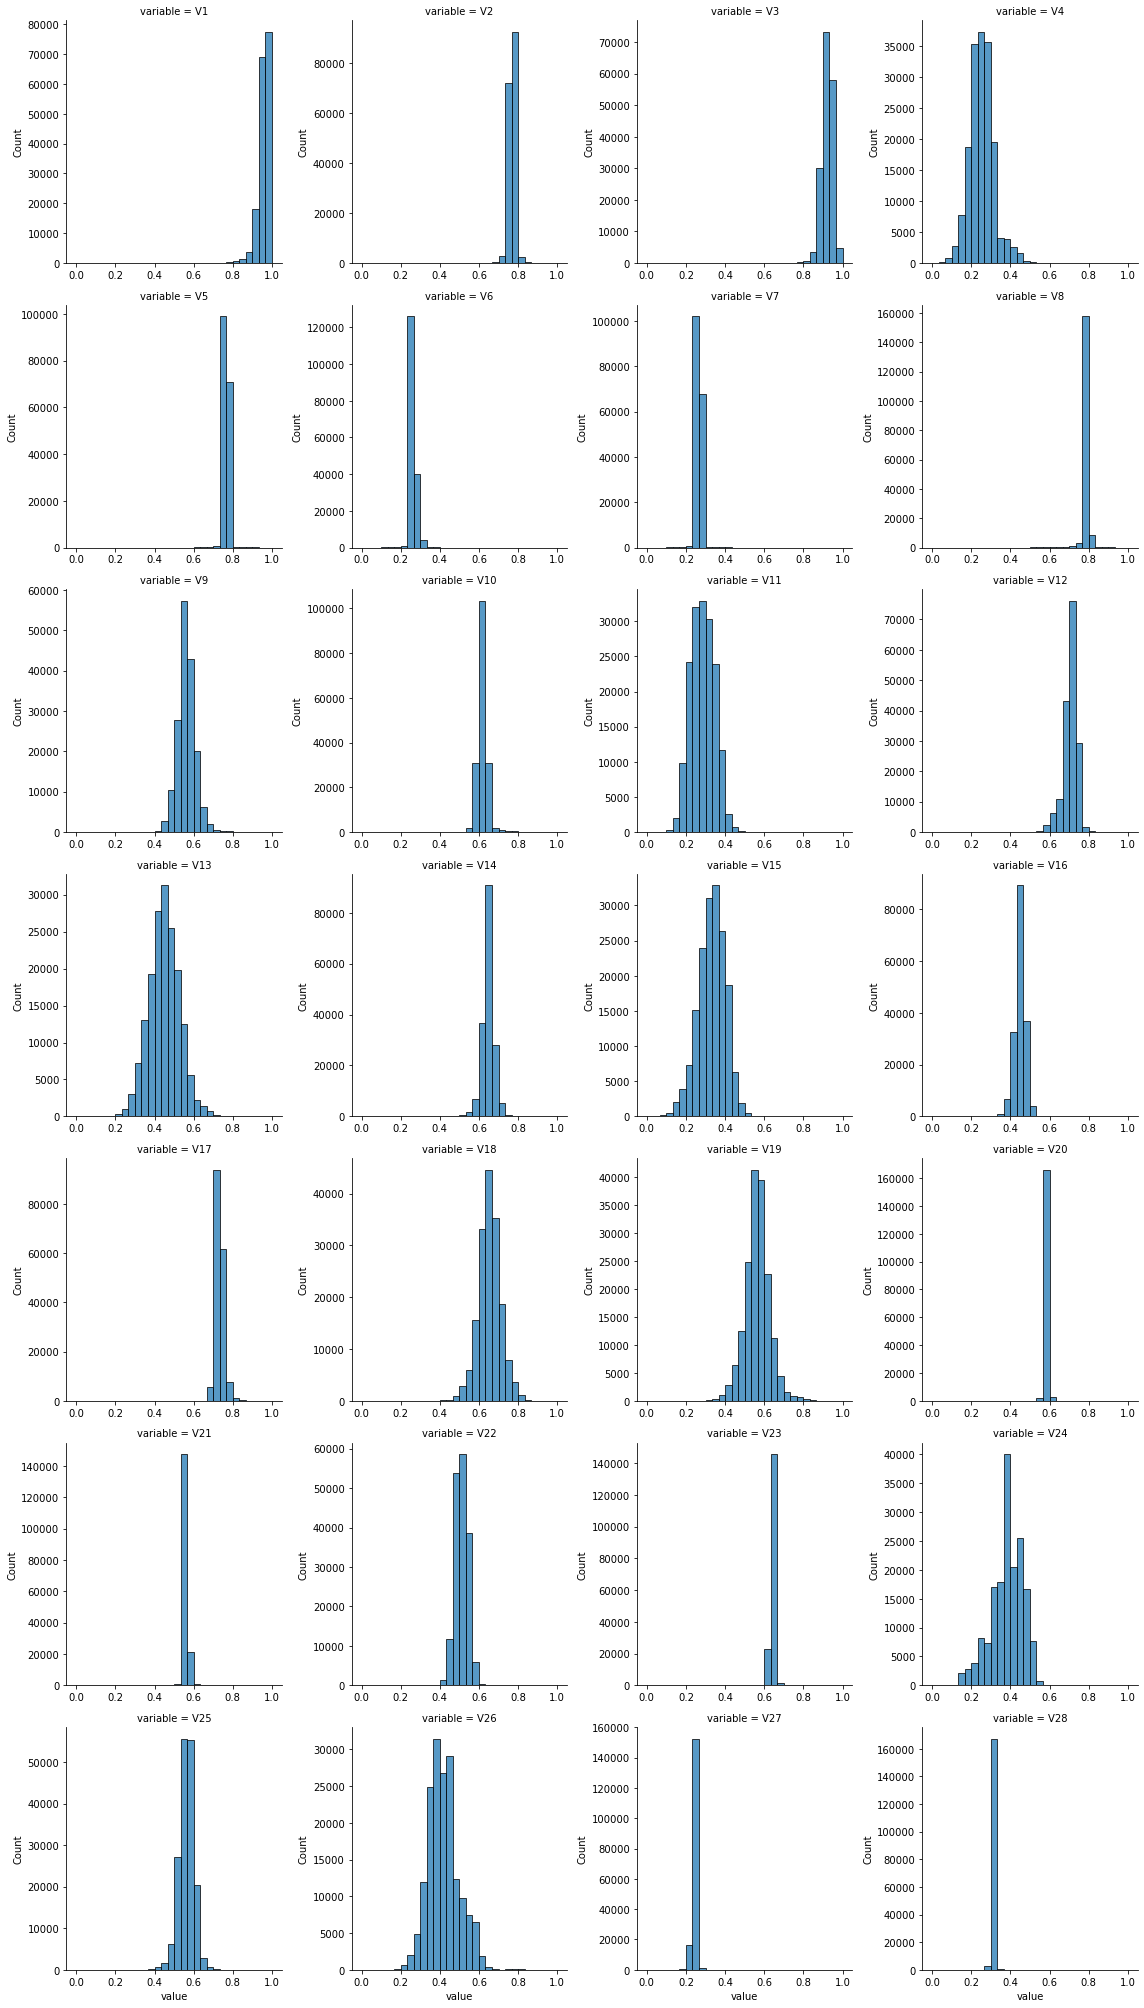

In [21]:
g = sns.FacetGrid(train[X_list].melt(), col='variable', col_wrap=4, sharex=False, sharey=False, height=4)
g.map(sns.histplot, 'value', bins=30)

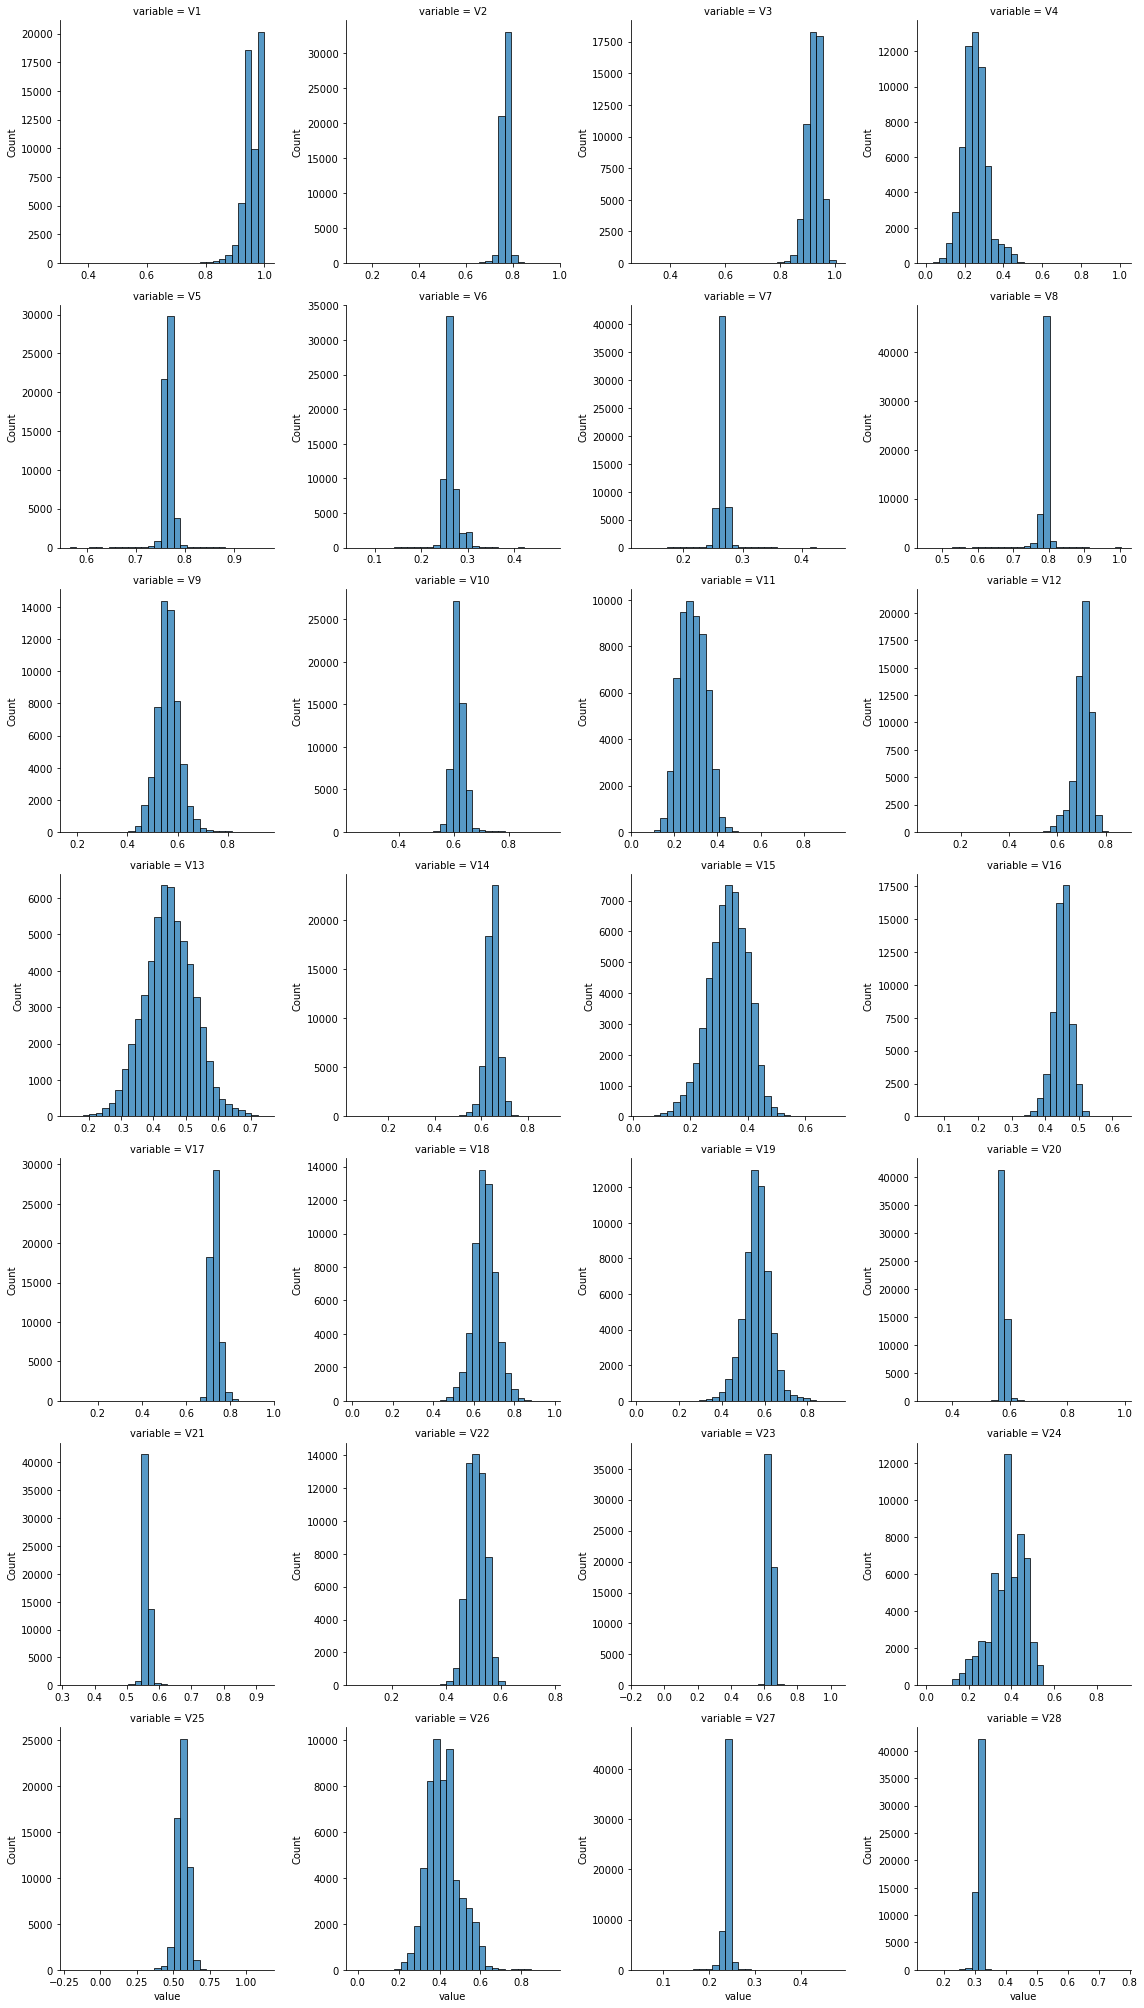

In [22]:
g = sns.FacetGrid(val[X_list].melt(), col='variable', col_wrap=4, sharex=False, sharey=False, height=4)
g.map(sns.histplot, 'value', bins=30)

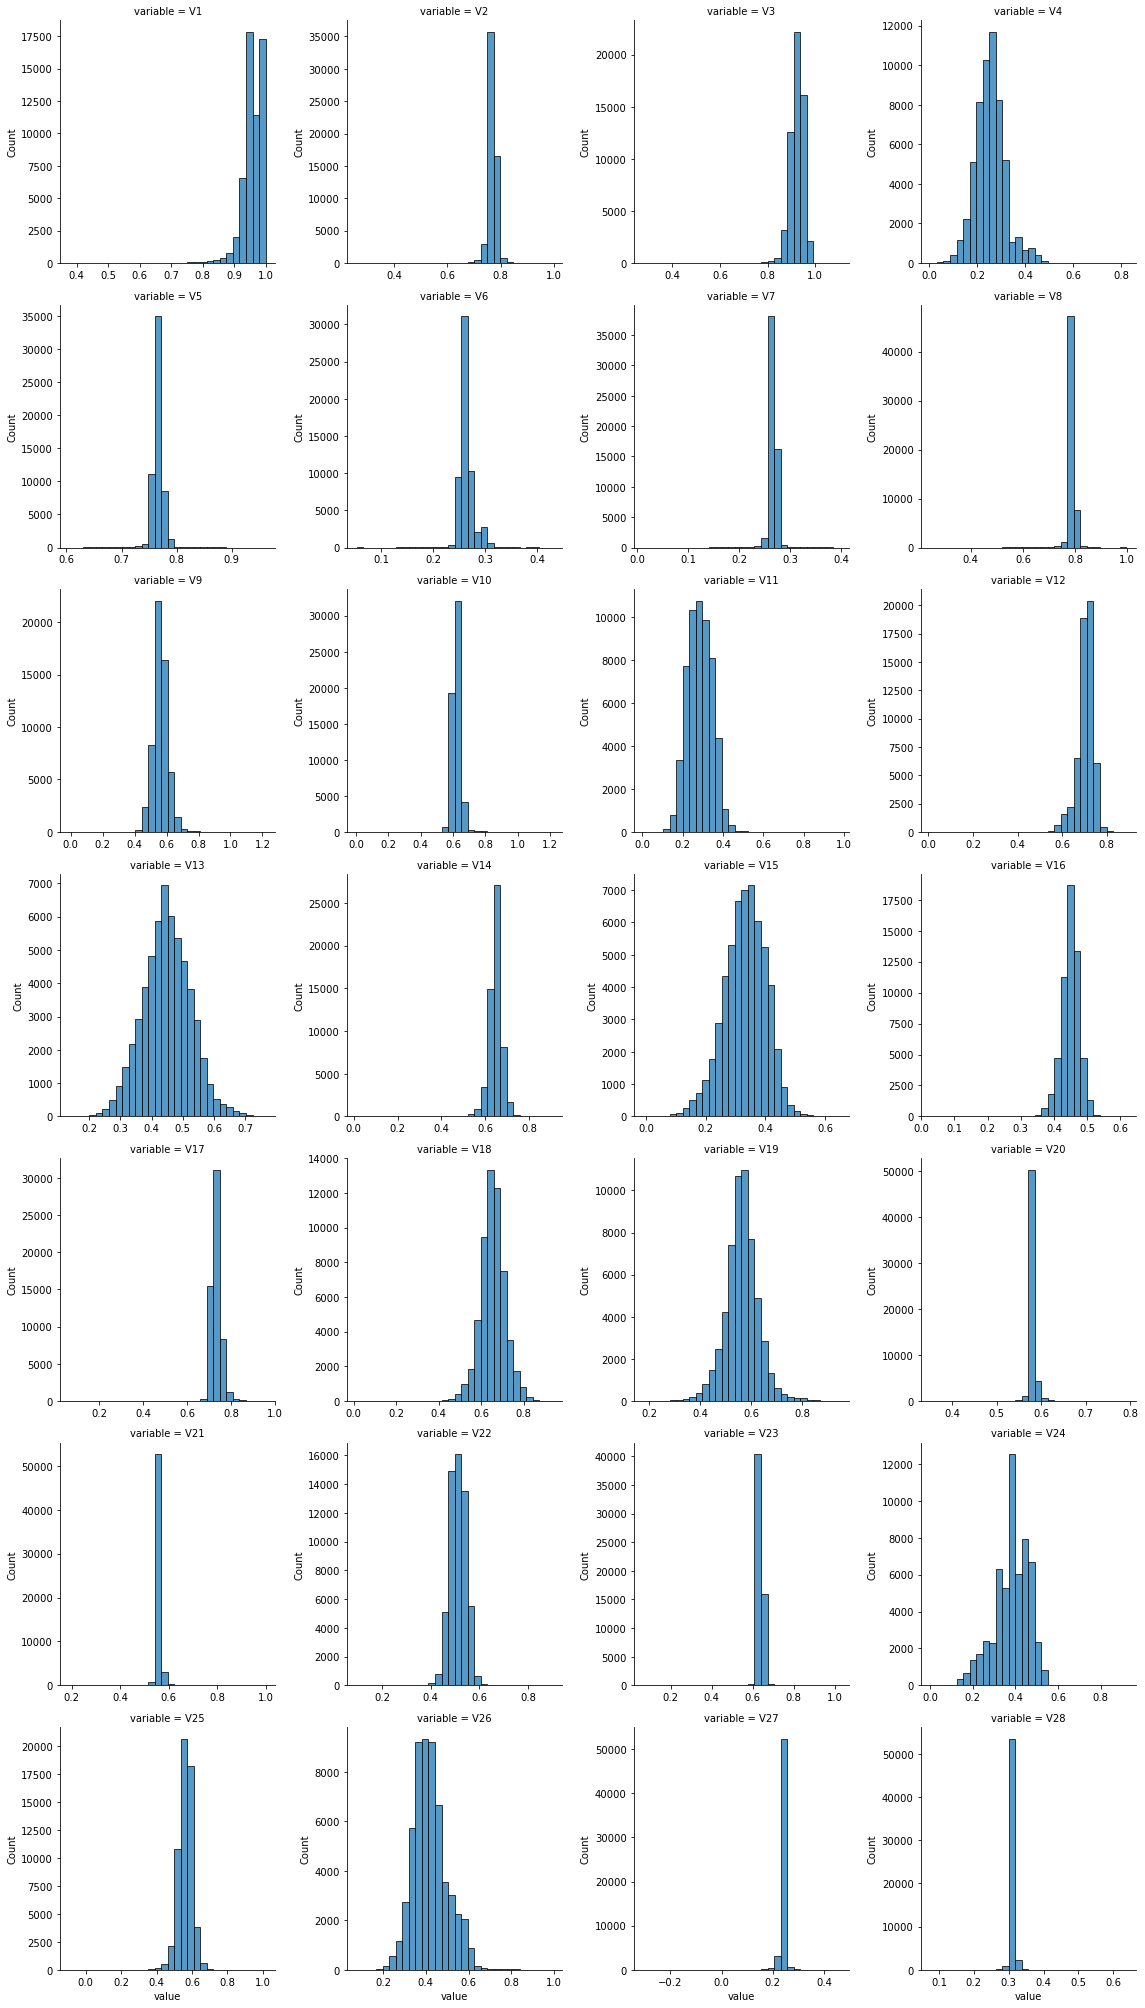

In [23]:
g = sns.FacetGrid(test[X_list].melt(), col='variable', col_wrap=4, sharex=False, sharey=False, height=4)
g.map(sns.histplot, 'value', bins=30)

In [24]:
b = train[X_list].describe()
pd.set_option('float_format', '{:.17f}'.format)
b

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
count,170883.00000000000000000,170883.00000000000000000,170883.00000000000000000,170883.00000000000000000,170883.00000000000000000,170883.00000000000000000,170883.00000000000000000,170883.00000000000000000,170883.00000000000000000,170883.00000000000000000,...,170883.00000000000000000,170883.00000000000000000,170883.00000000000000000,170883.00000000000000000,170883.00000000000000000,170883.00000000000000000,170883.00000000000000000,170883.00000000000000000,170883.00000000000000000,170883.00000000000000000
mean,0.95826059676329867,0.76727242326737854,0.92171626892242631,0.25361076362593121,0.76571186607758879,0.26302656087457454,0.26534613272469082,0.78890757981763382,0.56176309421660797,0.61720458385556487,...,0.56343324167890163,0.58027162425200951,0.56147164447343167,0.51002594614995123,0.63801193214615914,0.38236600879174509,0.56141617452696035,0.41878080516918903,0.23838267599748617,0.31311981872584504
std,0.03346963380689211,0.01752507876028334,0.02913048385688398,0.06328354337657956,0.00944834117651720,0.01351493261002461,0.00774343762280165,0.01315693399748481,0.04629024957661394,0.02745485007689830,...,0.06361066288912058,0.00824906598427489,0.01205363269354355,0.03388570353560896,0.01075411034505351,0.08145296091326425,0.03911663082576423,0.07969148216535522,0.00974787649709259,0.00670856571997658
min,0.00000000000000000,0.00000000000000000,0.00000000000000000,0.00000000000000000,0.00000000000000000,0.00000000000000000,0.00000000000000000,0.00000000000000000,0.00000000000000000,0.00000000000000000,...,0.00000000000000000,0.00000000000000000,0.00000000000000000,0.00000000000000000,0.00000000000000000,0.00000000000000000,0.00000000000000000,0.00000000000000000,0.00000000000000000,0.00000000000000000
25%,0.94268063345866704,0.76094668862695447,0.90479264984281738,0.21576260339027925,0.76107319315514399,0.25528658942729687,0.26198192386196306,0.78669282564023257,0.53464498275146521,0.60380878990258968,...,0.52779252340240568,0.57801084064319241,0.55779170801576772,0.48478098889583954,0.63520072933573835,0.33465635489011764,0.53764792926243410,0.36474854508131693,0.23668430338641977,0.31204526683674028
50%,0.95856485204067332,0.76796633058685626,0.92515364132641442,0.25268598548820226,0.76534366911116214,0.26025839745062979,0.26560184820059962,0.78917758066227361,0.55964132750907825,0.61490400455523064,...,0.56374110960283985,0.57959908156526274,0.56099869576206363,0.51030441272616656,0.63782095105873371,0.38779732511602283,0.56262655027244490,0.41030408057060386,0.23843042362216466,0.31335344494815481
75%,0.98063934814391263,0.77574871672573265,0.94132766663014200,0.28665335524780161,0.76983731462515714,0.26702972176636675,0.26883315296188387,0.79246769872497280,0.58702908992831693,0.62860811111525550,...,0.59922420271819732,0.58168174718083931,0.56448465594449571,0.53472759497986877,0.64058301145743135,0.44151743353113521,0.58783196457359077,0.45861868513264231,0.24058812713097161,0.31471283362191249
max,1.00000000000000000,1.00000000000000000,1.00000000000000000,1.00000000000000000,0.99999999999999989,0.99999999999999989,1.00000000000000000,0.99999999999999989,1.00000000000000000,1.00000000000000000,...,0.99999999999999989,0.99999999999999989,0.99999999999999989,0.99999999999999989,1.00000000000000000,1.00000000000000000,1.00000000000000000,0.99999999999999989,1.00000000000000000,1.00000000000000000


## ALGORITHMS

In [25]:
def calculate_metrics(df, x):
    acc = accuracy_score(df['target'], df[x])
    prec = precision_score(df['target'], df[x])
    rec = recall_score(df['target'], df[x])
    f1 = f1_score(df['target'], df[x])
    auc = roc_auc_score(df['target'], df[x])
    
    print(f" Accuracy is {acc}")
    print(f" Precision is {prec:2f}")
    print(f" Recall is {rec:2f}")
    print(f" F1-Score is {f1:2f}")
    print(f" AUC score is {auc:2f}")

## 1. K Neighbours

In [28]:
knn = KNeighborsClassifier(n_neighbors=15, weights = 'uniform')

In [29]:
# train the classifier using the training set
knn.fit(train[X_list], train[y_list])

C:\Users\khann\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=15)

### 2.1 - KNN ON TRAIN SET -

In [30]:
# make predictions on the Train set
train['prediction_KNN'] = knn.predict(train[X_list])

In [31]:
cm_knn_tr = confusion_matrix(train['target'], train['prediction_KNN'])
cm_knn_tr

array([[170536,     31],
       [    67,    249]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

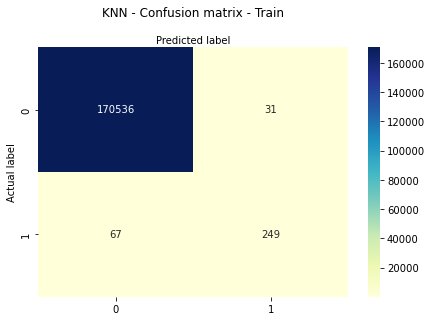

In [32]:

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm_knn_tr), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('KNN - Confusion matrix - Train', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')




In [33]:
calculate_metrics(train, 'prediction_KNN')

 Accuracy is 0.999426508195666
 Precision is 0.889286
 Recall is 0.787975
 F1-Score is 0.835570
 AUC score is 0.893896


### 2.2 - KNN ON VAL SET -

In [34]:
# make predictions on the VAL set
val['prediction_KNN'] = knn.predict(val[X_list])

In [35]:
cm_knn_val = confusion_matrix(val['target'], val['prediction_KNN'])
cm_knn_val

array([[56879,     5],
       [   18,    60]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

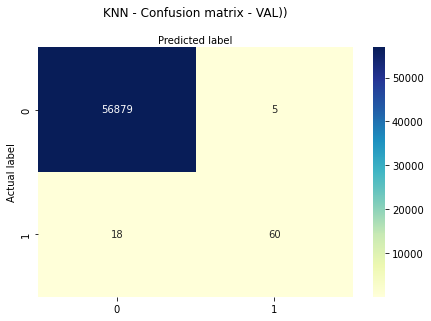

In [36]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm_knn_val), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('KNN - Confusion matrix - VAL))', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [37]:
calculate_metrics(val, 'prediction_KNN')

 Accuracy is 0.9995962220427653
 Precision is 0.923077
 Recall is 0.769231
 F1-Score is 0.839161
 AUC score is 0.884571


### 2.3 - KNN ON TEST SET -

In [38]:
# make predictions on the Test set
test['prediction_KNN'] = knn.predict(test[X_list])

In [40]:
cm_knn_ts = confusion_matrix(test['target'], test['prediction_KNN'])
cm_knn_ts

array([[56856,     8],
       [   23,    75]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

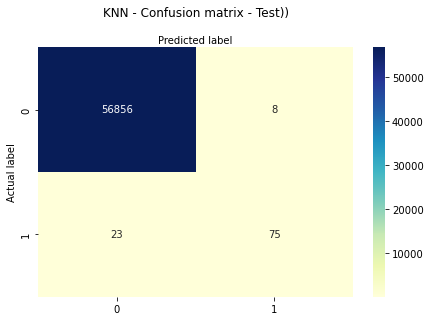

In [41]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm_knn_ts), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('KNN - Confusion matrix - Test))', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [42]:
calculate_metrics(test, 'prediction_KNN')

 Accuracy is 0.9994557775359011
 Precision is 0.903614
 Recall is 0.765306
 F1-Score is 0.828729
 AUC score is 0.882583


## 3. Support Vector Machine

In [43]:
clf = svm.SVC(kernel='rbf', C=10)

In [44]:
# train the classifier using the training set
clf.fit(train[X_list], train[y_list])


C:\Users\khann\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=10)

### 3.1 SVM on TRAIN Set

In [45]:
# make predictions on the Train set
train['prediction_SVM'] = clf.predict(train[X_list])

In [46]:
cm_svm_tr = confusion_matrix(train['target'], train['prediction_SVM'])
cm_svm_tr

array([[170530,     37],
       [    64,    252]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

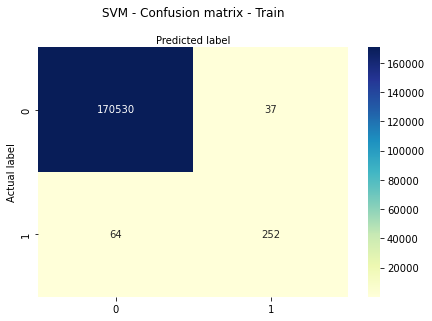

In [47]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm_svm_tr), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('SVM - Confusion matrix - Train', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [48]:
calculate_metrics(train, 'prediction_SVM')

 Accuracy is 0.9994089523241048
 Precision is 0.871972
 Recall is 0.797468
 F1-Score is 0.833058
 AUC score is 0.898626


### 3.2 SVM on VALIDATION SET

In [49]:
val['prediction_SVM'] = clf.predict(val[X_list])

In [50]:
cm_svm_val = confusion_matrix(val['target'], val['prediction_SVM'])
cm_svm_val

array([[56876,     8],
       [   15,    63]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

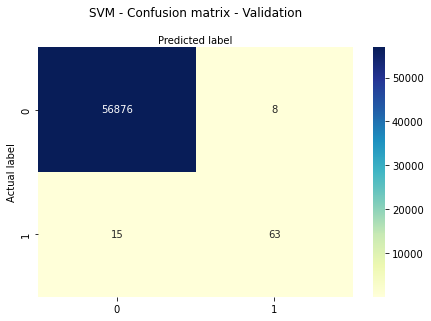

In [51]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm_svm_val), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('SVM - Confusion matrix - Validation', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [52]:
calculate_metrics(val, 'prediction_SVM')

 Accuracy is 0.9995962220427653
 Precision is 0.887324
 Recall is 0.807692
 F1-Score is 0.845638
 AUC score is 0.903776


### 3.3 SVM on TEST SET

In [53]:
test['prediction_SVM'] = clf.predict(test[X_list])

In [54]:
cm_svm_ts = confusion_matrix(test['target'], test['prediction_SVM'])
cm_svm_ts

array([[56849,    15],
       [   20,    78]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

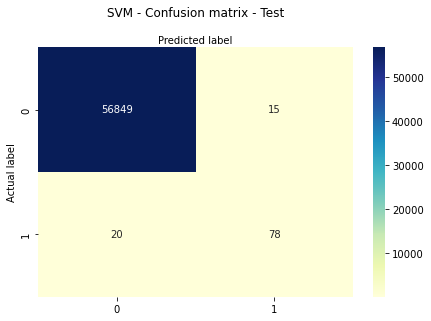

In [55]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm_svm_ts), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('SVM - Confusion matrix - Test', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [56]:
calculate_metrics(test, 'prediction_SVM')

 Accuracy is 0.999385555282469
 Precision is 0.838710
 Recall is 0.795918
 F1-Score is 0.816754
 AUC score is 0.897827


## Manual tuning

### K N neigbours value at = 3 5 10 15 25 50

In [ ]:
# KNN - 3
knn_3 = KNeighborsClassifier(n_neighbors=3)

# train the classifier using the training set
knn_3.fit(train[X_list], train[y_list])

In [ ]:
train['pred_KNN_N_3'] = knn_3.predict(train[X_list])

In [ ]:
cm_knn_tr = confusion_matrix(train['target'], train['pred_KNN_N_3'])
cm_knn_tr

In [ ]:
calculate_metrics(train, 'pred_KNN_N_3')

In [ ]:
# make predictions on the VAL set
val['pred_KNN_N_3'] = knn_3.predict(val[X_list])

In [ ]:
calculate_metrics(val, 'pred_KNN_N_3')

In [ ]:
# make predictions on the VAL set
test['pred_KNN_N_3'] = knn_3.predict(test[X_list])

In [ ]:
calculate_metrics(test, 'pred_KNN_N_3')

In [ ]:
# KNN - 5
knn_5 = KNeighborsClassifier(n_neighbors=3)

# train the classifier using the training set
knn_5.fit(train[X_list], train[y_list])

In [ ]:
train['pred_KNN_N_5'] = knn_5.predict(train[X_list])

In [ ]:
calculate_metrics(train, 'pred_KNN_N_5')

In [ ]:

val['pred_KNN_N_5'] = knn_5.predict(val[X_list])

In [ ]:
calculate_metrics(val, 'pred_KNN_N_5')

In [ ]:

start_time = time.time()

test['pred_KNN_N_5'] = knn_5.predict(test[X_list])

end_time = time.time()

elapsed_time = end_time - start_time

# format elapsed time into MM.SS format
mm_ss_time = time.strftime("%M:%S", time.gmtime(elapsed_time))

print("Elapsed time:", mm_ss_time)


In [ ]:
calculate_metrics(test, 'pred_KNN_N_5')

In [ ]:
# KNN - 10
knn_10 = KNeighborsClassifier(n_neighbors=10)

# train the classifier using the training set
knn_10.fit(train[X_list], train[y_list])

In [ ]:
start_time = time.time()

train['pred_KNN_N_10'] = knn_10.predict(train[X_list])

end_time = time.time()
elapsed_time = end_time - start_time
mm_ss_time = time.strftime("%M:%S", time.gmtime(elapsed_time))

print("Elapsed time:", mm_ss_time)

In [ ]:
calculate_metrics(train, 'pred_KNN_N_10')

In [ ]:
start_time = time.time()

X = 1+2+3+4*3

end_time = time.time()

elapsed_time = end_time - start_time

mm_ss_time = time.strftime("%M:%S", time.gmtime(elapsed_time))

print("Elapsed time:", mm_ss_time)

In [ ]:
#VAL
start_time = time.time()

val['pred_KNN_N_10'] = knn_10.predict(val[X_list])

end_time = time.time()

elapsed_time = end_time - start_time
mm_ss_time = time.strftime("%M:%S", time.gmtime(elapsed_time))

print("Elapsed time:", mm_ss_time)

In [ ]:
calculate_metrics(val, 'pred_KNN_N_10')

In [ ]:
#TEST
start_time = time.time()

test['pred_KNN_N_10'] = knn_10.predict(test[X_list])

end_time = time.time()

elapsed_time = end_time - start_time
mm_ss_time = time.strftime("%M:%S", time.gmtime(elapsed_time))

print("Elapsed time:", mm_ss_time)

In [ ]:
calculate_metrics(test, 'pred_KNN_N_10')

In [ ]:
#KNN - N = 15

knn_15 = KNeighborsClassifier(n_neighbors=15)

# train the classifier using the training set
knn_15.fit(train[X_list], train[y_list])

In [ ]:
start_time = time.time()

train['pred_KNN_N_15'] = knn_15.predict(train[X_list])

end_time = time.time()
elapsed_time = end_time - start_time
mm_ss_time = time.strftime("%M:%S", time.gmtime(elapsed_time))

print("Elapsed time:", mm_ss_time)

In [ ]:
calculate_metrics(train, 'pred_KNN_N_15')

In [ ]:
start_time = time.time()

val['pred_KNN_N_15'] = knn_15.predict(val[X_list])

end_time = time.time()
elapsed_time = end_time - start_time
mm_ss_time = time.strftime("%M:%S", time.gmtime(elapsed_time))

print("Elapsed time:", mm_ss_time)

In [ ]:
calculate_metrics(val, 'pred_KNN_N_15')

In [ ]:
start_time = time.time()

test['pred_KNN_N_15'] = knn_15.predict(test[X_list])

end_time = time.time()
elapsed_time = end_time - start_time
mm_ss_time = time.strftime("%M:%S", time.gmtime(elapsed_time))

print("Elapsed time:", mm_ss_time)

In [ ]:
calculate_metrics(test, 'pred_KNN_N_15')

In [ ]:
#KNN - N = 25

knn_25 = KNeighborsClassifier(n_neighbors=25)

# train the classifier using the training set
knn_25.fit(train[X_list], train[y_list])

In [ ]:
start_time = time.time()

train['pred_KNN_N_25'] = knn_25.predict(train[X_list])

end_time = time.time()
elapsed_time = end_time - start_time
mm_ss_time = time.strftime("%M:%S", time.gmtime(elapsed_time))

print("Elapsed time:", mm_ss_time)

In [ ]:
calculate_metrics(train, 'pred_KNN_N_25')

In [ ]:
start_time = time.time()

val['pred_KNN_N_25'] = knn_25.predict(val[X_list])

end_time = time.time()
elapsed_time = end_time - start_time
mm_ss_time = time.strftime("%M:%S", time.gmtime(elapsed_time))

print("Elapsed time:", mm_ss_time)

In [ ]:
calculate_metrics(val, 'pred_KNN_N_25')

In [ ]:
start_time = time.time()

test['pred_KNN_N_25'] = knn_25.predict(test[X_list])

end_time = time.time()
elapsed_time = end_time - start_time
mm_ss_time = time.strftime("%M:%S", time.gmtime(elapsed_time))

print("Elapsed time:", mm_ss_time)

In [ ]:
calculate_metrics(test, 'pred_KNN_N_25')

In [ ]:
#KNN - N = 25

knn_50 = KNeighborsClassifier(n_neighbors=50)

# train the classifier using the training set
knn_50.fit(train[X_list], train[y_list])

In [ ]:
start_time = time.time()

train['pred_KNN_N_50'] = knn_50.predict(train[X_list])

end_time = time.time()
elapsed_time = end_time - start_time
mm_ss_time = time.strftime("%M:%S", time.gmtime(elapsed_time))

print("Elapsed time:", mm_ss_time)

In [ ]:
calculate_metrics(train, 'pred_KNN_N_50')

In [ ]:
start_time = time.time()

val['pred_KNN_N_50'] = knn_50.predict(val[X_list])

end_time = time.time()
elapsed_time = end_time - start_time
mm_ss_time = time.strftime("%M:%S", time.gmtime(elapsed_time))

print("Elapsed time:", mm_ss_time)

In [ ]:
calculate_metrics(val, 'pred_KNN_N_50')

In [ ]:
start_time = time.time()

test['pred_KNN_N_50'] = knn_50.predict(test[X_list])

end_time = time.time()
elapsed_time = end_time - start_time
mm_ss_time = time.strftime("%M:%S", time.gmtime(elapsed_time))

print("Elapsed time:", mm_ss_time)

In [ ]:
calculate_metrics(test, 'pred_KNN_N_50')

In [ ]:
# WEIGHT - UNIFORM

In [ ]:
knn_wu = KNeighborsClassifier(n_neighbors=15, weights='uniform')

# train the classifier using the training set
knn_wu.fit(train[X_list], train[y_list])

In [ ]:
start_time = time.time()

train['pred_KNN_wg_u'] = knn_wu.predict(train[X_list])

end_time = time.time()
elapsed_time = end_time - start_time
mm_ss_time = time.strftime("%M:%S", time.gmtime(elapsed_time))

print("Elapsed time:", mm_ss_time)

In [ ]:
calculate_metrics(train, 'pred_KNN_wg_u')

In [ ]:
start_time = time.time()

val['pred_KNN_wg_u'] = knn_wu.predict(val[X_list])

end_time = time.time()
elapsed_time = end_time - start_time
mm_ss_time = time.strftime("%M:%S", time.gmtime(elapsed_time))

print("Elapsed time:", mm_ss_time)

In [ ]:
calculate_metrics(val, 'pred_KNN_wg_u')

In [ ]:
start_time = time.time()

test['pred_KNN_wg_u'] = knn_wu.predict(test[X_list])

end_time = time.time()
elapsed_time = end_time - start_time
mm_ss_time = time.strftime("%M:%S", time.gmtime(elapsed_time))

print("Elapsed time:", mm_ss_time)

In [ ]:
calculate_metrics(test, 'pred_KNN_wg_u')

In [ ]:
# KNN - Distance

knn_dt = KNeighborsClassifier(n_neighbors=15, weights='distance')

# train the classifier using the training set
knn_dt.fit(train[X_list], train[y_list])

In [ ]:
start_time = time.time()

train['pred_KNN_wg_dt'] = knn_dt.predict(train[X_list])

end_time = time.time()
elapsed_time = end_time - start_time
mm_ss_time = time.strftime("%M:%S", time.gmtime(elapsed_time))

print("Elapsed time:", mm_ss_time)

In [ ]:
calculate_metrics(train, 'pred_KNN_wg_dt')

In [ ]:
start_time = time.time()

val['pred_KNN_wg_dt'] = knn_dt.predict(val[X_list])

end_time = time.time()
elapsed_time = end_time - start_time
mm_ss_time = time.strftime("%M:%S", time.gmtime(elapsed_time))

print("Elapsed time:", mm_ss_time)

In [ ]:
calculate_metrics(val, 'pred_KNN_wg_dt')

In [ ]:
start_time = time.time()

test['pred_KNN_wg_dt'] = knn_dt.predict(test[X_list])

end_time = time.time()
elapsed_time = end_time - start_time
mm_ss_time = time.strftime("%M:%S", time.gmtime(elapsed_time))

print("Elapsed time:", mm_ss_time)

In [ ]:
calculate_metrics(test, 'pred_KNN_wg_dt')

### ALGORITHM HYPER PARAMETER - KNN

### BRUTE 

In [ ]:
knn_alg_br = KNeighborsClassifier(n_neighbors=15, algorithm='brute')

# train the classifier using the training set
knn_alg_br.fit(train[X_list], train[y_list])

In [ ]:
start_time = time.time()

train['pred_KNN_alg_br'] = knn_alg_br.predict(train[X_list])

end_time = time.time()
elapsed_time = end_time - start_time
mm_ss_time = time.strftime("%M:%S", time.gmtime(elapsed_time))

print("Elapsed time:", mm_ss_time)

In [ ]:
calculate_metrics(train, 'pred_KNN_alg_br')

In [ ]:
start_time = time.time()

val['pred_KNN_alg_br'] = knn_alg_br.predict(val[X_list])

end_time = time.time()
elapsed_time = end_time - start_time
mm_ss_time = time.strftime("%M:%S", time.gmtime(elapsed_time))

print("Elapsed time:", mm_ss_time)

In [ ]:
calculate_metrics(val, 'pred_KNN_alg_br')

In [ ]:
start_time = time.time()

test['pred_KNN_alg_br'] = knn_alg_br.predict(test[X_list])

end_time = time.time()
elapsed_time = end_time - start_time
mm_ss_time = time.strftime("%M:%S", time.gmtime(elapsed_time))

print("Elapsed time:", mm_ss_time)

In [ ]:
calculate_metrics(test, 'pred_KNN_alg_br')

### Kd tree

In [ ]:
knn_alg_tr = KNeighborsClassifier(n_neighbors=15, algorithm='kd_tree')

# train the classifier using the training set
knn_alg_tr.fit(train[X_list], train[y_list])

In [ ]:
start_time = time.time()

train['pred_KNN_alg_tr'] = knn_alg_tr.predict(train[X_list])

end_time = time.time()
elapsed_time = end_time - start_time
mm_ss_time = time.strftime("%M:%S", time.gmtime(elapsed_time))

print("Elapsed time:", mm_ss_time)

In [ ]:
calculate_metrics(train, 'pred_KNN_alg_tr')

In [ ]:
start_time = time.time()

val['pred_KNN_alg_tr'] = knn_alg_tr.predict(val[X_list])

end_time = time.time()
elapsed_time = end_time - start_time
mm_ss_time = time.strftime("%M:%S", time.gmtime(elapsed_time))

print("Elapsed time:", mm_ss_time)

In [ ]:
calculate_metrics(val, 'pred_KNN_alg_tr')

In [ ]:
start_time = time.time()

test['pred_KNN_alg_tr'] = knn_alg_tr.predict(test[X_list])

end_time = time.time()
elapsed_time = end_time - start_time
mm_ss_time = time.strftime("%M:%S", time.gmtime(elapsed_time))

print("Elapsed time:", mm_ss_time)

In [ ]:
calculate_metrics(test, 'pred_KNN_alg_tr')

### Ball-tree

In [ ]:
knn_alg_bl = KNeighborsClassifier(n_neighbors=15, algorithm='ball_tree')

# train the classifier using the training set
knn_alg_bl.fit(train[X_list], train[y_list])

In [ ]:
start_time = time.time()

train['pred_KNN_alg_bl'] = knn_alg_bl.predict(train[X_list])

end_time = time.time()
elapsed_time = end_time - start_time
mm_ss_time = time.strftime("%M:%S", time.gmtime(elapsed_time))

print("Elapsed time:", mm_ss_time)

In [ ]:
calculate_metrics(train, 'pred_KNN_alg_bl')

In [ ]:
start_time = time.time()

val['pred_KNN_alg_bl'] = knn_alg_bl.predict(val[X_list])

end_time = time.time()
elapsed_time = end_time - start_time
mm_ss_time = time.strftime("%M:%S", time.gmtime(elapsed_time))

print("Elapsed time:", mm_ss_time)

In [ ]:
calculate_metrics(val, 'pred_KNN_alg_bl')

In [ ]:
start_time = time.time()

test['pred_KNN_alg_bl'] = knn_alg_bl.predict(test[X_list])

end_time = time.time()
elapsed_time = end_time - start_time
mm_ss_time = time.strftime("%M:%S", time.gmtime(elapsed_time))

print("Elapsed time:", mm_ss_time)

In [ ]:
calculate_metrics(test, 'pred_KNN_alg_bl')

## SVM HYPERPARAMETERS TUNING -

### 1. REGULARISATION

In [ ]:
#C1 - 0.1
svm_c1 = svm.SVC(C=0.1)

# train the classifier using the training set
svm_c1.fit(train[X_list], train[y_list])

In [ ]:
start_time = time.time()

train['pred_svc_c1'] = svm_c1.predict(train[X_list])

end_time = time.time()
elapsed_time = end_time - start_time
mm_ss_time = time.strftime("%M:%S", time.gmtime(elapsed_time))

print("Elapsed time:", mm_ss_time)

In [ ]:
calculate_metrics(train, 'pred_svc_c1')

In [ ]:
start_time = time.time()

val['pred_svc_c1'] = svm_c1.predict(val[X_list])

end_time = time.time()
elapsed_time = end_time - start_time
mm_ss_time = time.strftime("%M:%S", time.gmtime(elapsed_time))

print("Elapsed time:", mm_ss_time)

In [ ]:
calculate_metrics(val, 'pred_svc_c1')

In [ ]:
start_time = time.time()

test['pred_svc_c1'] = svm_c1.predict(test[X_list])

end_time = time.time()
elapsed_time = end_time - start_time
mm_ss_time = time.strftime("%M:%S", time.gmtime(elapsed_time))

print("Elapsed time:", mm_ss_time)

In [ ]:
calculate_metrics(val, 'pred_svc_c1')

In [ ]:
#C2 - 1
svm_c2 = svm.SVC(C=1)

# train the classifier using the training set
svm_c2.fit(train[X_list], train[y_list])

In [ ]:
train['pred_svc_c2'] = svm_c2.predict(train[X_list])

In [ ]:
calculate_metrics(train, 'pred_svc_c2')

In [ ]:
val['pred_svc_c2'] = svm_c2.predict(val[X_list])

In [ ]:
calculate_metrics(val, 'pred_svc_c2')

In [ ]:
test['pred_svc_c2'] = svm_c2.predict(test[X_list])

In [ ]:
calculate_metrics(test, 'pred_svc_c2')

In [ ]:
[0.1, 1, 10, 100, 1000]


In [26]:
#C3 - 10
svm_c3 = svm.SVC(C=10)

In [27]:
start_time = time.time()


# fit the classifier using the training set
svm_c3.fit(train[X_list], train[y_list])

end_time = time.time()
elapsed_time = end_time - start_time
mm_ss_time = time.strftime("%M:%S", time.gmtime(elapsed_time))

print("Elapsed time:", mm_ss_time)



C:\Users\khann\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Elapsed time: 10:06


In [29]:
start_time = time.time()

train['pred_svc_c3'] = svm_c3.predict(train[X_list])

end_time = time.time()
elapsed_time = end_time - start_time
mm_ss_time = time.strftime("%M:%S", time.gmtime(elapsed_time))

print("Elapsed time:", mm_ss_time)

Elapsed time: 00:06


In [30]:
calculate_metrics(train, 'pred_svc_c3')

 Accuracy is 0.9994089523241048
 Precision is 0.871972
 Recall is 0.797468
 F1-Score is 0.833058
 AUC score is 0.898626


In [31]:
start_time = time.time()

val['pred_svc_c3'] = svm_c3.predict(val[X_list])

end_time = time.time()
elapsed_time = end_time - start_time
mm_ss_time = time.strftime("%M:%S", time.gmtime(elapsed_time))

print("Elapsed time:", mm_ss_time)

Elapsed time: 00:02


In [32]:
calculate_metrics(val, 'pred_svc_c3')

 Accuracy is 0.9995962220427653
 Precision is 0.887324
 Recall is 0.807692
 F1-Score is 0.845638
 AUC score is 0.903776


In [33]:
start_time = time.time()

test['pred_svc_c3'] = svm_c3.predict(test[X_list])

end_time = time.time()
elapsed_time = end_time - start_time
mm_ss_time = time.strftime("%M:%S", time.gmtime(elapsed_time))

print("Elapsed time:", mm_ss_time)

Elapsed time: 00:02


In [34]:
calculate_metrics(test, 'pred_svc_c3')

 Accuracy is 0.999385555282469
 Precision is 0.838710
 Recall is 0.795918
 F1-Score is 0.816754
 AUC score is 0.897827


In [36]:
#C4 - 100
svm_c4 = svm.SVC(C=100)

In [37]:
start_time = time.time()


# fit the classifier using the training set
svm_c4.fit(train[X_list], train[y_list])

end_time = time.time()
elapsed_time = end_time - start_time
mm_ss_time = time.strftime("%M:%S", time.gmtime(elapsed_time))

print("Elapsed time:", mm_ss_time)

C:\Users\khann\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Elapsed time: 00:15


In [38]:
start_time = time.time()

train['pred_svc_c4'] = svm_c4.predict(train[X_list])

end_time = time.time()
elapsed_time = end_time - start_time
mm_ss_time = time.strftime("%M:%S", time.gmtime(elapsed_time))

print("Elapsed time:", mm_ss_time)

Elapsed time: 00:05


In [40]:
calculate_metrics(train, 'pred_svc_c4')

 Accuracy is 0.999490879724724
 Precision is 0.919414
 Recall is 0.794304
 F1-Score is 0.852292
 AUC score is 0.897087


In [41]:
start_time = time.time()

val['pred_svc_c4'] = svm_c4.predict(val[X_list])

end_time = time.time()
elapsed_time = end_time - start_time
mm_ss_time = time.strftime("%M:%S", time.gmtime(elapsed_time))

print("Elapsed time:", mm_ss_time)

Elapsed time: 00:02


In [42]:
calculate_metrics(val, 'pred_svc_c4')

 Accuracy is 0.9995786664794073
 Precision is 0.909091
 Recall is 0.769231
 F1-Score is 0.833333
 AUC score is 0.884563


In [43]:
start_time = time.time()

test['pred_svc_c4'] = svm_c4.predict(test[X_list])

end_time = time.time()
elapsed_time = end_time - start_time
mm_ss_time = time.strftime("%M:%S", time.gmtime(elapsed_time))

print("Elapsed time:", mm_ss_time)

Elapsed time: 00:02


In [44]:
calculate_metrics(test, 'pred_svc_c4')

 Accuracy is 0.9994908886626171
 Precision is 0.905882
 Recall is 0.785714
 F1-Score is 0.841530
 AUC score is 0.892787


In [45]:
#C5 - 1000
svm_c5 = svm.SVC(C=1000)

In [46]:
start_time = time.time()


# fit the classifier using the training set
svm_c5.fit(train[X_list], train[y_list])

end_time = time.time()
elapsed_time = end_time - start_time
mm_ss_time = time.strftime("%M:%S", time.gmtime(elapsed_time))

print("Elapsed time:", mm_ss_time)

C:\Users\khann\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Elapsed time: 00:45


In [47]:
start_time = time.time()

train['pred_svc_c5'] = svm_c5.predict(train[X_list])

end_time = time.time()
elapsed_time = end_time - start_time
mm_ss_time = time.strftime("%M:%S", time.gmtime(elapsed_time))

print("Elapsed time:", mm_ss_time)

Elapsed time: 00:07


In [48]:
calculate_metrics(train, 'pred_svc_c5')

 Accuracy is 0.999643030611588
 Precision is 0.973978
 Recall is 0.829114
 F1-Score is 0.895726
 AUC score is 0.914536


In [49]:
start_time = time.time()

val['pred_svc_c5'] = svm_c5.predict(val[X_list])

end_time = time.time()
elapsed_time = end_time - start_time
mm_ss_time = time.strftime("%M:%S", time.gmtime(elapsed_time))

print("Elapsed time:", mm_ss_time)

Elapsed time: 00:02


In [50]:
calculate_metrics(val, 'pred_svc_c5')

 Accuracy is 0.9996313331694814
 Precision is 0.925373
 Recall is 0.794872
 F1-Score is 0.855172
 AUC score is 0.897392


In [51]:
start_time = time.time()

test['pred_svc_c5'] = svm_c5.predict(test[X_list])

end_time = time.time()
elapsed_time = end_time - start_time
mm_ss_time = time.strftime("%M:%S", time.gmtime(elapsed_time))

print("Elapsed time:", mm_ss_time)

Elapsed time: 00:02


In [52]:
calculate_metrics(test, 'pred_svc_c5')

 Accuracy is 0.9995611109160493
 Precision is 0.962025
 Recall is 0.775510
 F1-Score is 0.858757
 AUC score is 0.887729


### KERNEL

In [56]:
#1 - linear
svm_k_l = SVC(kernel='linear')

In [57]:
start_time = time.time()


# fit the classifier using the training set
svm_k_l.fit(train[X_list], train[y_list])

end_time = time.time()
elapsed_time = end_time - start_time
mm_ss_time = time.strftime("%M:%S", time.gmtime(elapsed_time))

print("Elapsed time:", mm_ss_time)

C:\Users\khann\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Elapsed time: 00:04


In [59]:
start_time = time.time()

train['pred_svc_ker_linear'] = svm_k_l.predict(train[X_list])

end_time = time.time()
elapsed_time = end_time - start_time
mm_ss_time = time.strftime("%M:%S", time.gmtime(elapsed_time))

print("Elapsed time:", mm_ss_time)

Elapsed time: 00:01


In [60]:
calculate_metrics(train, 'pred_svc_ker_linear')

 Accuracy is 0.999350432752234
 Precision is 0.857143
 Recall is 0.778481
 F1-Score is 0.815920
 AUC score is 0.889120


In [63]:
start_time = time.time()

val['pred_svc_ker_linear'] = svm_k_l.predict(val[X_list])

end_time = time.time()
elapsed_time = end_time - start_time
mm_ss_time = time.strftime("%M:%S", time.gmtime(elapsed_time))

print("Elapsed time:", mm_ss_time)

Elapsed time: 00:00


In [64]:
calculate_metrics(val, 'pred_svc_ker_linear')

 Accuracy is 0.9995611109160493
 Precision is 0.895522
 Recall is 0.769231
 F1-Score is 0.827586
 AUC score is 0.884554


In [65]:
start_time = time.time()

test['pred_svc_ker_linear'] = svm_k_l.predict(test[X_list])

end_time = time.time()
elapsed_time = end_time - start_time
mm_ss_time = time.strftime("%M:%S", time.gmtime(elapsed_time))

print("Elapsed time:", mm_ss_time)

Elapsed time: 00:00


In [66]:
calculate_metrics(test, 'pred_svc_ker_linear')

 Accuracy is 0.9993679997191109
 Precision is 0.852273
 Recall is 0.765306
 F1-Score is 0.806452
 AUC score is 0.882539


['linear', 'poly', 'rbf', 'sigmoid']

In [69]:
#2 - polynomial
svm_k_p = SVC(kernel='poly')

In [70]:
start_time = time.time()

# fit the classifier using the training set
svm_k_p.fit(train[X_list], train[y_list])

end_time = time.time()
elapsed_time = end_time - start_time
mm_ss_time = time.strftime("%M:%S", time.gmtime(elapsed_time))

print("Elapsed time:", mm_ss_time)

C:\Users\khann\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Elapsed time: 00:16


In [71]:
start_time = time.time()

train['pred_svc_ker_poly'] = svm_k_p.predict(train[X_list])

end_time = time.time()
elapsed_time = end_time - start_time
mm_ss_time = time.strftime("%M:%S", time.gmtime(elapsed_time))

print("Elapsed time:", mm_ss_time)

Elapsed time: 00:01


In [72]:
calculate_metrics(train, 'pred_svc_ker_poly')

 Accuracy is 0.9994089523241048
 Precision is 0.877193
 Recall is 0.791139
 F1-Score is 0.831947
 AUC score is 0.895467


In [73]:
start_time = time.time()

val['pred_svc_ker_poly'] = svm_k_p.predict(val[X_list])

end_time = time.time()
elapsed_time = end_time - start_time
mm_ss_time = time.strftime("%M:%S", time.gmtime(elapsed_time))

print("Elapsed time:", mm_ss_time)

Elapsed time: 00:00


In [74]:
calculate_metrics(val, 'pred_svc_ker_poly')

 Accuracy is 0.9995962220427653
 Precision is 0.887324
 Recall is 0.807692
 F1-Score is 0.845638
 AUC score is 0.903776


In [75]:
start_time = time.time()

test['pred_svc_ker_poly'] = svm_k_p.predict(test[X_list])

end_time = time.time()
elapsed_time = end_time - start_time
mm_ss_time = time.strftime("%M:%S", time.gmtime(elapsed_time))

print("Elapsed time:", mm_ss_time)

Elapsed time: 00:00


In [76]:
calculate_metrics(test, 'pred_svc_ker_poly')

 Accuracy is 0.9993679997191109
 Precision is 0.829787
 Recall is 0.795918
 F1-Score is 0.812500
 AUC score is 0.897818


['linear', 'poly', 'rbf', 'sigmoid']

In [78]:
#3 - polynomial
svm_k_rbf = SVC(kernel='rbf')

In [79]:
start_time = time.time()

# fit the classifier using the training set
svm_k_rbf.fit(train[X_list], train[y_list])

end_time = time.time()
elapsed_time = end_time - start_time
mm_ss_time = time.strftime("%M:%S", time.gmtime(elapsed_time))

print("Elapsed time:", mm_ss_time)

C:\Users\khann\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Elapsed time: 00:04


In [80]:
start_time = time.time()

train['pred_svc_ker_rbf'] = svm_k_rbf.predict(train[X_list])

end_time = time.time()
elapsed_time = end_time - start_time
mm_ss_time = time.strftime("%M:%S", time.gmtime(elapsed_time))

print("Elapsed time:", mm_ss_time)

Elapsed time: 00:06


In [81]:
calculate_metrics(train, 'pred_svc_ker_rbf')

 Accuracy is 0.9993328768806727
 Precision is 0.832237
 Recall is 0.800633
 F1-Score is 0.816129
 AUC score is 0.900167


In [82]:
start_time = time.time()

val['pred_svc_ker_rbf'] = svm_k_rbf.predict(val[X_list])

end_time = time.time()
elapsed_time = end_time - start_time
mm_ss_time = time.strftime("%M:%S", time.gmtime(elapsed_time))

print("Elapsed time:", mm_ss_time)

Elapsed time: 00:01


In [83]:
calculate_metrics(val, 'pred_svc_ker_rbf')

 Accuracy is 0.9995435553526912
 Precision is 0.851351
 Recall is 0.807692
 F1-Score is 0.828947
 AUC score is 0.903749


In [84]:
start_time = time.time()

test['pred_svc_ker_rbf'] = svm_k_rbf.predict(test[X_list])

end_time = time.time()
elapsed_time = end_time - start_time
mm_ss_time = time.strftime("%M:%S", time.gmtime(elapsed_time))

print("Elapsed time:", mm_ss_time)

Elapsed time: 00:02


In [85]:
calculate_metrics(test, 'pred_svc_ker_rbf')

 Accuracy is 0.9993328885923949
 Precision is 0.812500
 Recall is 0.795918
 F1-Score is 0.804124
 AUC score is 0.897801


### Decision Function Shape

In [102]:
#1 - One-vs-One

svm_df_ovo = SVC(decision_function_shape= 'ovo')


In [104]:
start_time = time.time()

# fit the classifier using the training set
svm_df_ovo.fit(train[X_list], train[y_list])

end_time = time.time()
elapsed_time = end_time - start_time
mm_ss_time = time.strftime("%M:%S", time.gmtime(elapsed_time))

print("Elapsed time:", mm_ss_time)

C:\Users\khann\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Elapsed time: 00:04


In [105]:
start_time = time.time()

train['pred_svc_df_ovo'] = svm_df_ovo.predict(train[X_list])

end_time = time.time()
elapsed_time = end_time - start_time
mm_ss_time = time.strftime("%M:%S", time.gmtime(elapsed_time))

print("Elapsed time:", mm_ss_time)

Elapsed time: 00:05


In [106]:
calculate_metrics(train, 'pred_svc_df_ovo')

 Accuracy is 0.9993328768806727
 Precision is 0.832237
 Recall is 0.800633
 F1-Score is 0.816129
 AUC score is 0.900167


In [107]:
start_time = time.time()

val['pred_svc_df_ovo'] = svm_df_ovo.predict(val[X_list])

end_time = time.time()
elapsed_time = end_time - start_time
mm_ss_time = time.strftime("%M:%S", time.gmtime(elapsed_time))

print("Elapsed time:", mm_ss_time)

Elapsed time: 00:02


In [108]:
calculate_metrics(val, 'pred_svc_df_ovo')

 Accuracy is 0.9995435553526912
 Precision is 0.851351
 Recall is 0.807692
 F1-Score is 0.828947
 AUC score is 0.903749


In [109]:
start_time = time.time()

test['pred_svc_df_ovo'] = svm_df_ovo.predict(test[X_list])

end_time = time.time()
elapsed_time = end_time - start_time
mm_ss_time = time.strftime("%M:%S", time.gmtime(elapsed_time))

print("Elapsed time:", mm_ss_time)

Elapsed time: 00:01


In [110]:
calculate_metrics(test, 'pred_svc_df_ovo')

 Accuracy is 0.9993328885923949
 Precision is 0.812500
 Recall is 0.795918
 F1-Score is 0.804124
 AUC score is 0.897801


In [111]:
#2 - One-vs-REST

svm_df_ovr = SVC(decision_function_shape= 'ovr')

In [112]:
start_time = time.time()

# fit the classifier using the training set
svm_df_ovr.fit(train[X_list], train[y_list])

end_time = time.time()
elapsed_time = end_time - start_time
mm_ss_time = time.strftime("%M:%S", time.gmtime(elapsed_time))

print("Elapsed time:", mm_ss_time)

C:\Users\khann\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Elapsed time: 00:04


In [113]:
start_time = time.time()

train['pred_svc_df_ovr'] = svm_df_ovr.predict(train[X_list])

end_time = time.time()
elapsed_time = end_time - start_time
mm_ss_time = time.strftime("%M:%S", time.gmtime(elapsed_time))

print("Elapsed time:", mm_ss_time)

Elapsed time: 00:05


In [114]:
calculate_metrics(train, 'pred_svc_df_ovr')

 Accuracy is 0.9993328768806727
 Precision is 0.832237
 Recall is 0.800633
 F1-Score is 0.816129
 AUC score is 0.900167


In [115]:
start_time = time.time()

val['pred_svc_df_ovr'] = svm_df_ovr.predict(val[X_list])

end_time = time.time()
elapsed_time = end_time - start_time
mm_ss_time = time.strftime("%M:%S", time.gmtime(elapsed_time))

print("Elapsed time:", mm_ss_time)

Elapsed time: 00:01


In [117]:
calculate_metrics(val, 'pred_svc_df_ovr')

 Accuracy is 0.9995435553526912
 Precision is 0.851351
 Recall is 0.807692
 F1-Score is 0.828947
 AUC score is 0.903749


In [118]:
start_time = time.time()

test['pred_svc_df_ovr'] = svm_df_ovr.predict(test[X_list])

end_time = time.time()
elapsed_time = end_time - start_time
mm_ss_time = time.strftime("%M:%S", time.gmtime(elapsed_time))

print("Elapsed time:", mm_ss_time)

Elapsed time: 00:01


In [119]:
calculate_metrics(test, 'pred_svc_df_ovr')

 Accuracy is 0.9993328885923949
 Precision is 0.812500
 Recall is 0.795918
 F1-Score is 0.804124
 AUC score is 0.897801
